In [2]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras_visualizer import visualizer

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [3]:
# Create Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\ariya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)

history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9011 - loss: 0.8988 - val_accuracy: 0.9790 - val_loss: 0.0666
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9818 - loss: 0.0573 - val_accuracy: 0.9850 - val_loss: 0.0553
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9872 - loss: 0.0420 - val_accuracy: 0.9846 - val_loss: 0.0500
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9891 - loss: 0.0352 - val_accuracy: 0.9763 - val_loss: 0.0829
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9905 - loss: 0.0292 - val_accuracy: 0.9856 - val_loss: 0.0599
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.9865 - val_loss: 0.0577
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9862 - val_loss: 0.0604
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9934 - loss: 

In [7]:
model.save('OCR_MODEL.h5')

In [8]:
visualizer(model=model, file_format='png', file_name='OCR_RNN')

In [9]:
#Predict Function
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(28, 28, 1), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    return tf.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Text(0.5, 1.0, 'Predicted Number : 8')

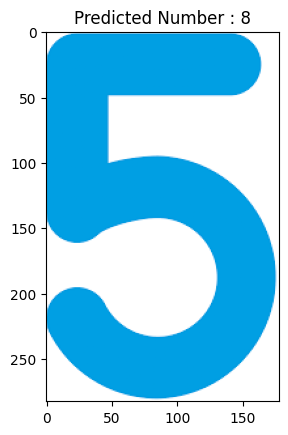

In [15]:
# Predicting number from test image


img = plt.imread('tests/five.jpg')
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Number : {predict_image('tests/five.jpg')}")